## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Morphology of Femoral Knee Cartilage](https://sbonaretti.github.io/pyKNEEr/morphology.html)
Content under Creative Commons Attribution license CC-BY-NC 4.0   
Code under GNU-GPL v3 License  
© 2019 Serena Bonaretti
---

Morphology quantifications of femoral cartilage are:  

- *Thickness*, computed in two steps:  
  - Separation of subcondral surface and articular surface of the cartilage
  - Calculation of the distance between the two surfaces using a nearest neighbor method [1]

- *Volume*, calculated as the volume of the cartilage mask multiplied by the image resolution

---

*Automatic data download for the reproducibility of this notebook:*
- Download input images from Zenodo and image file list from GitHub:

In [ ]:
import os
import wget
from zipfile import ZipFile 

In [ ]:
# local folder  
local_folder_name  = "./OAI1/"
# Zenodo variables
input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "OAI1_segmented.zip" 
# GitHub variables
raw_url            = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name    = "image_list_morphology_OAI1_DESS.txt"

In [ ]:
# create local folder for dataset
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

In [ ]:
# download zipped folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name) 

In [ ]:
# unzip folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# download input file from GitHub
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io        as io
from pykneer import morphology_for_nb as morph
%matplotlib inline

## Image information

Inputs:   
- `input_file_name` contains the list of femoral cartilage masks
- `thickness_algo` is the algorithm used to calculate cartilage thickness
- `n_of_cores` is the number of cores used for computations (computations are parallelized for speed)
- `output_file_name_thickness` contains the table with average and standard deviation of thickness
- `output_file_name_volume` contains the table with average volumes

In [3]:
# input_file_name            = "./image_list_morphology_OAI1_DESS.txt" # commented out because downloaded from GitHub
thickness_algo             = 1 # 1 for nearest neighbor on bone-cartilage surface 
                               # 2 for nearest neighbor on articular surface
n_of_cores                 = 10
output_file_name_thickness = "thickness_OAI1_DESS.csv"
output_file_name_volume    = "volume_OAI1_DESS.csv"

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_morphology(input_file_name)

-> image information loaded


---

## Cartilage Thickness

### Separating subcondral surface and articular surface of cartilage

To calculate cartilage thickness, first the cartilage surface is extracted from the binary mask. Then subcondral surface and articular surface are divided in two separate point clouds

In [5]:
morph.separate_cartilage_surfaces(image_data, n_of_cores)

YR04_01_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_03_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha
-> Subcondral and articular cartilage separated


#### Visual check 
Subcondral bone surface (yellow) and articular surface (blue) are visualized as flattened point clouds. The flattening is with respect to a cylinder interpolated into the cartilage surface [2]

YR04_01_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_03_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha


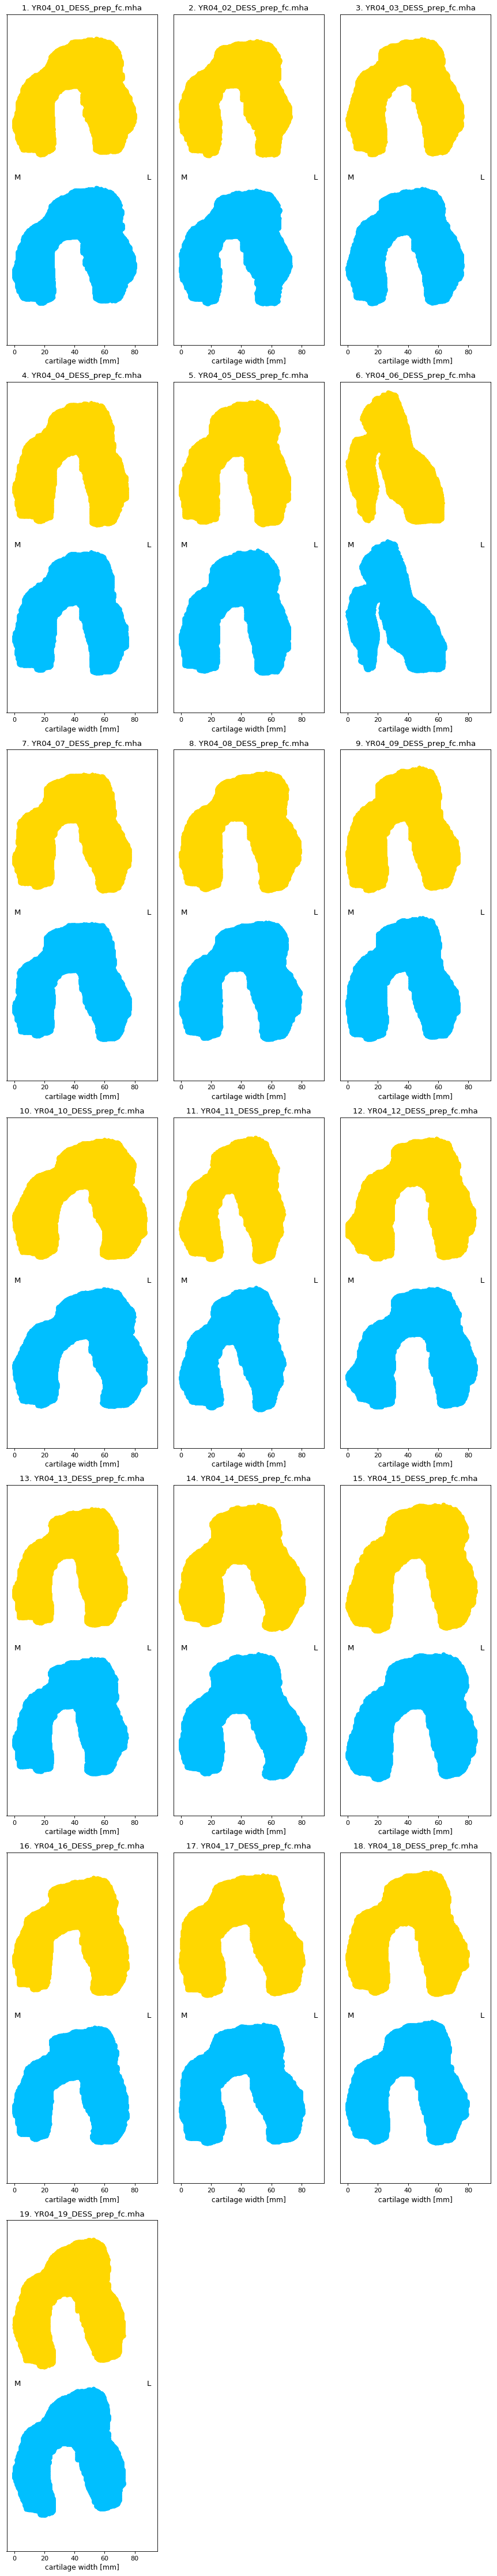

In [6]:
morph.show_cartilage_surfaces(image_data)

### Calculating cartilage thickness

Assign the chosen algorithm 

In [7]:
morph.algorithm(image_data, thickness_algo)

Calculate thickness

In [8]:
morph.calculate_thickness(image_data, n_of_cores)

YR04_03_DESS_prep_fc.mha
YR04_01_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha
-> Thickness computed
-> The total time was 54.48 seconds (about 0 min)


### Visualizing cartilage thickness

#### MAP: Thickness is represented as a colormap on the flattened cartilage [2]

YR04_01_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_03_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha


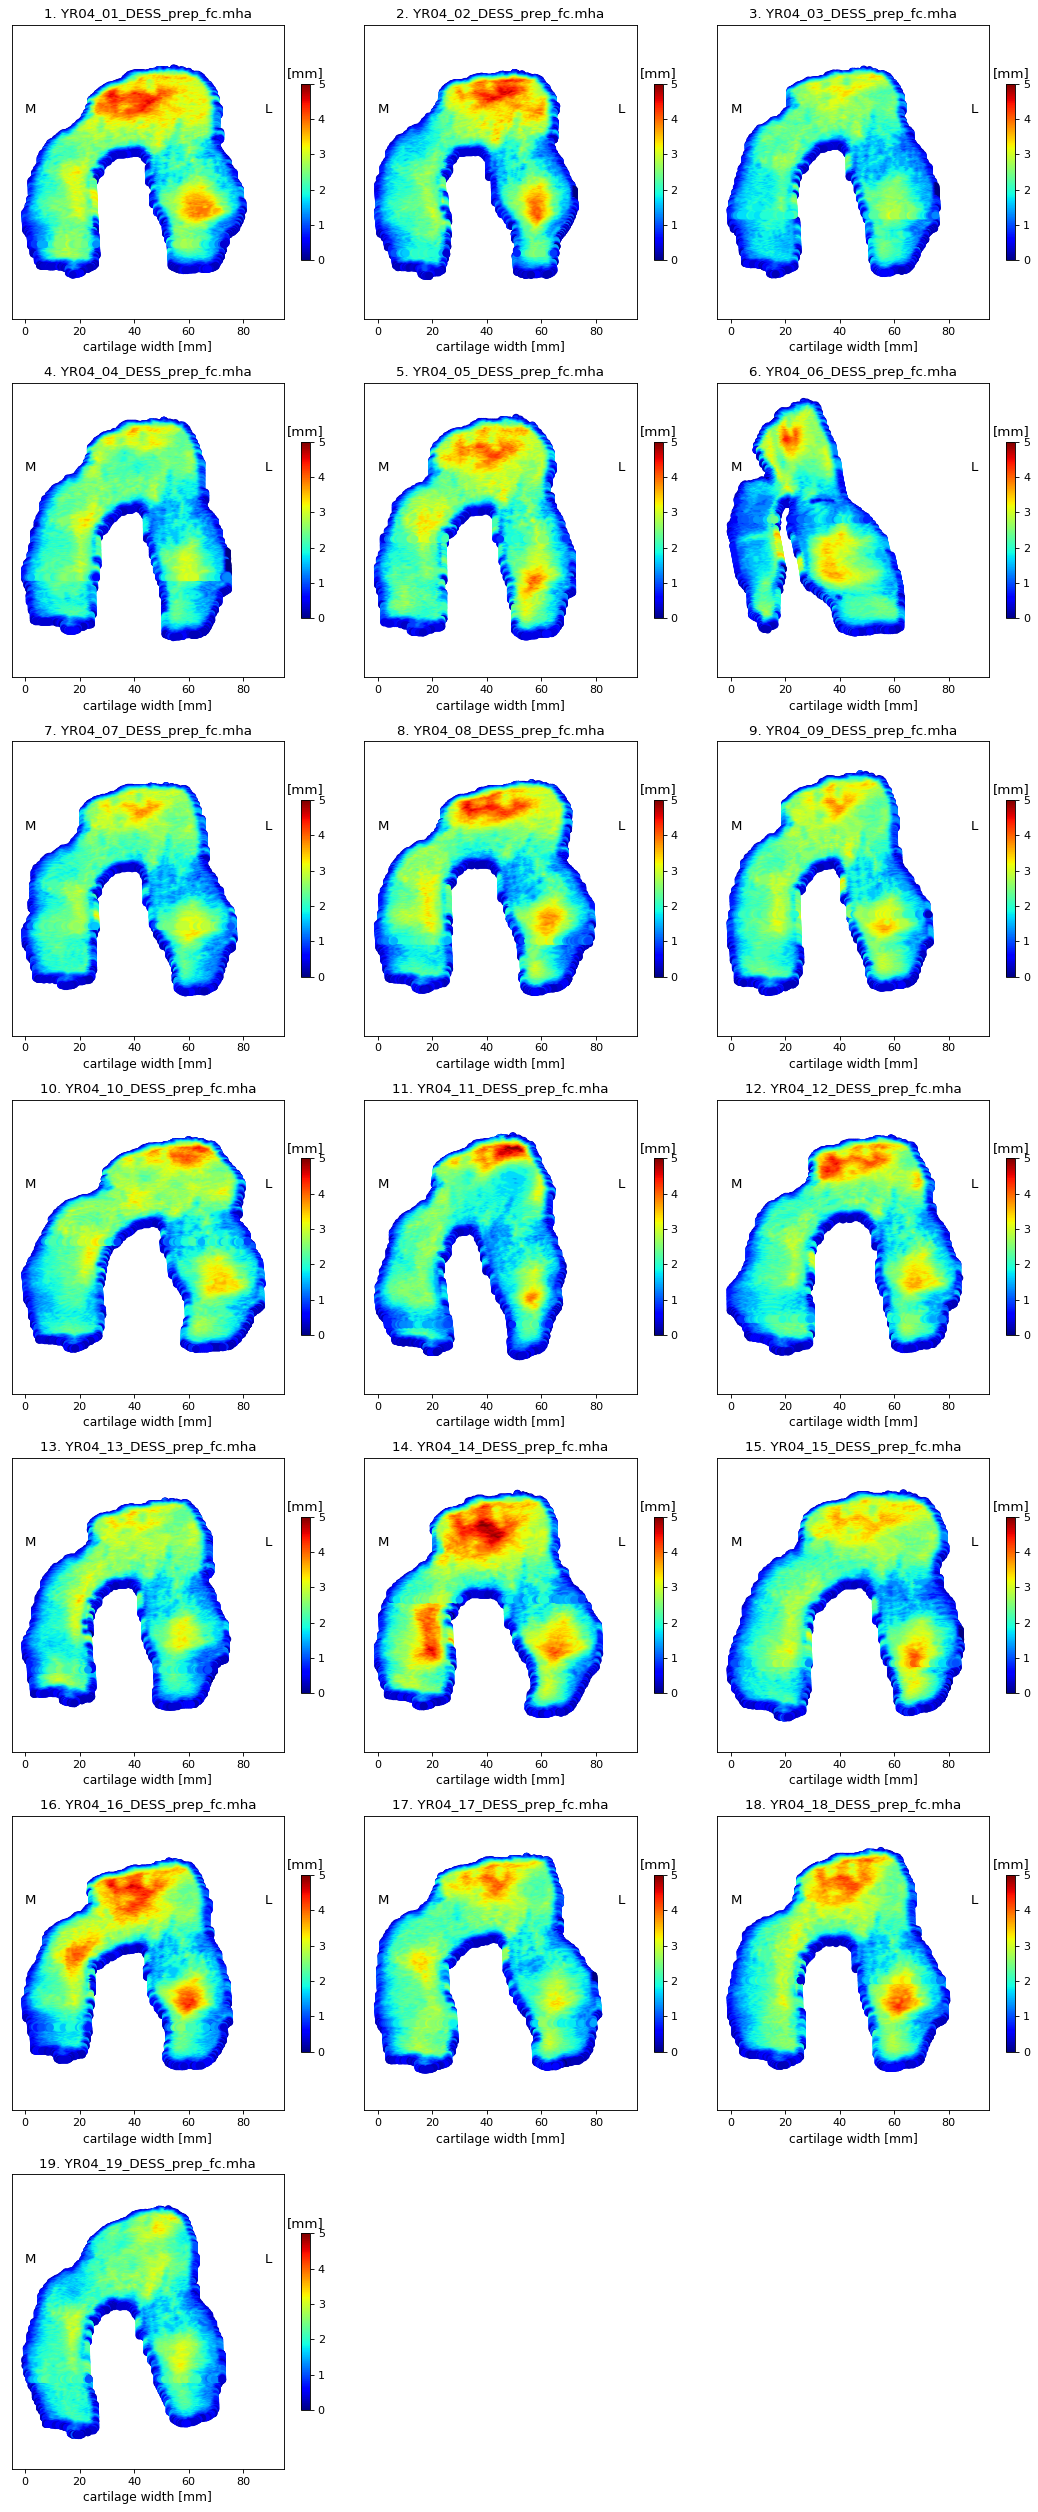

In [9]:
morph.show_thickness_maps(image_data)

#### GRAPH: Dots represent the average value of cartilage thickness per image; bars represents the standard deviation

<Figure size 1296x576 with 0 Axes>

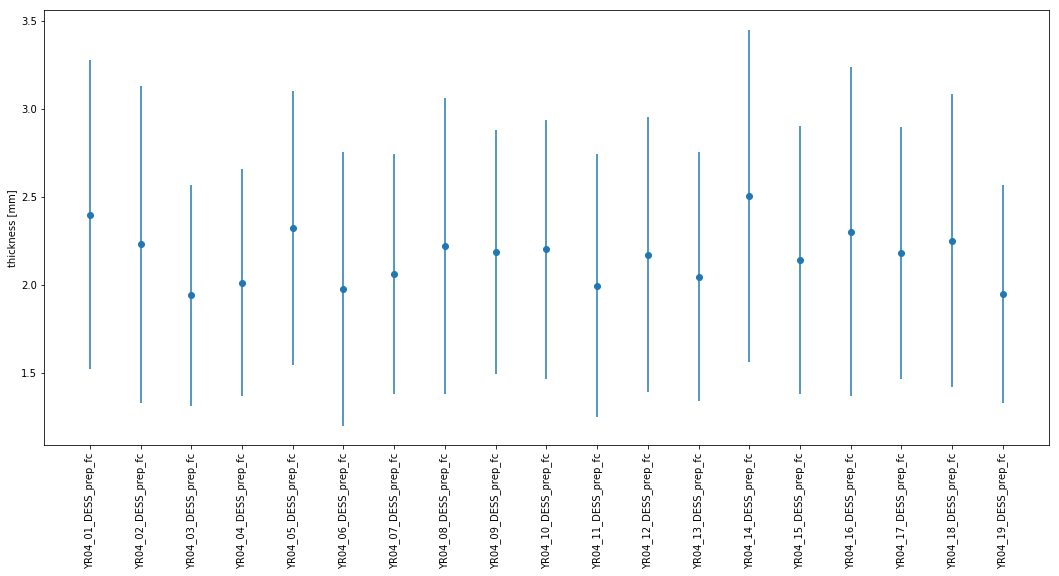

In [10]:
morph.show_thickness_graph(image_data)

#### TABLE: Average and standard deviation of cartilage thickness per image
The table is saved as a .csv file for subsequent analyisis

In [11]:
table = morph.show_thickness_table(image_data, output_file_name_thickness)
display(table)

Table saved as: thickness_OAI1_DESS.csv


,Subjects,averageThickness,std.dev
1,YR04_01_DESS_prep_fc_thickness_1,2.40,0.88
2,YR04_02_DESS_prep_fc_thickness_1,2.23,0.90
3,YR04_03_DESS_prep_fc_thickness_1,1.94,0.63
4,YR04_04_DESS_prep_fc_thickness_1,2.01,0.65
5,YR04_05_DESS_prep_fc_thickness_1,2.32,0.78
6,YR04_06_DESS_prep_fc_thickness_1,1.98,0.78
7,YR04_07_DESS_prep_fc_thickness_1,2.06,0.68
8,YR04_08_DESS_prep_fc_thickness_1,2.22,0.84
9,YR04_09_DESS_prep_fc_thickness_1,2.19,0.69
10,YR04_10_DESS_prep_fc_thickness_1,2.20,0.73


---

## Cartilage Volume

Calculate cartilage volume

In [12]:
morph.calculate_volume(image_data)

YR04_01_DESS_prep_fc.mha
YR04_02_DESS_prep_fc.mha
YR04_03_DESS_prep_fc.mha
YR04_04_DESS_prep_fc.mha
YR04_05_DESS_prep_fc.mha
YR04_06_DESS_prep_fc.mha
YR04_07_DESS_prep_fc.mha
YR04_08_DESS_prep_fc.mha
YR04_09_DESS_prep_fc.mha
YR04_10_DESS_prep_fc.mha
YR04_11_DESS_prep_fc.mha
YR04_12_DESS_prep_fc.mha
YR04_13_DESS_prep_fc.mha
YR04_14_DESS_prep_fc.mha
YR04_15_DESS_prep_fc.mha
YR04_16_DESS_prep_fc.mha
YR04_17_DESS_prep_fc.mha
YR04_18_DESS_prep_fc.mha
YR04_19_DESS_prep_fc.mha
-> Volume computed


### Visualizing cartilage volume

#### GRAPH: Dots represent cartilage volume per image

<Figure size 1296x576 with 0 Axes>

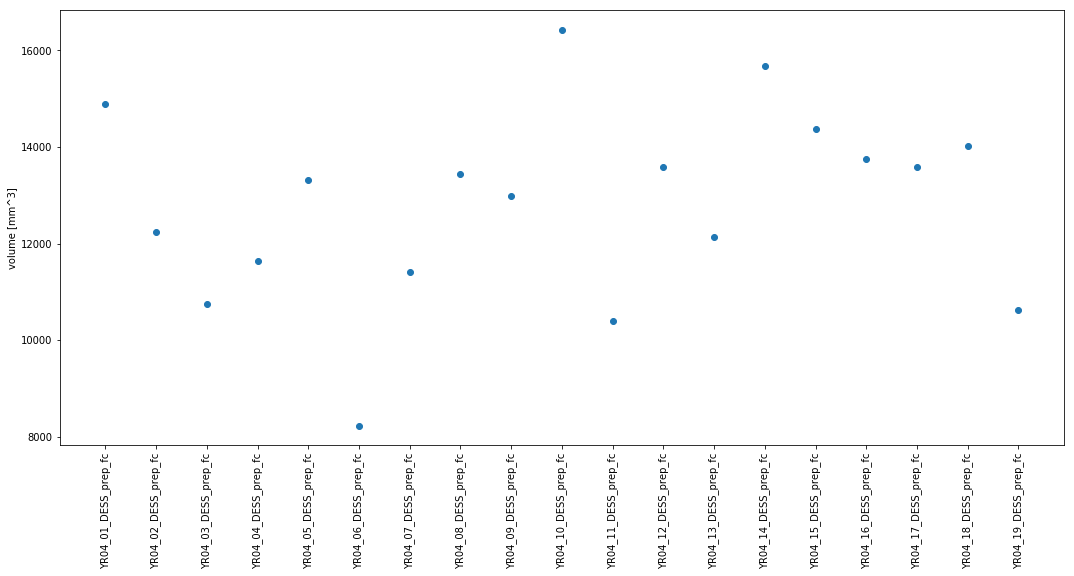

In [13]:
morph.show_volume_graph(image_data)

#### TABLE: Cartilage volume per image
The table is saved as a .csv file for subsequent analyisis

In [14]:
table = morph.show_volume_table(image_data, output_file_name_volume)
display(table)

Table saved as: volume_OAI1_DESS.csv


,Subjects,Volume
1,YR04_01_DESS_prep_fc,14887
2,YR04_02_DESS_prep_fc,12240
3,YR04_03_DESS_prep_fc,10744
4,YR04_04_DESS_prep_fc,11633
5,YR04_05_DESS_prep_fc,13319
6,YR04_06_DESS_prep_fc,8232
7,YR04_07_DESS_prep_fc,11418
8,YR04_08_DESS_prep_fc,13440
9,YR04_09_DESS_prep_fc,12983
10,YR04_10_DESS_prep_fc,16419


### References

[1] Maier J., Black M., Bonaretti S., Bier B., Eskofier B., Choi JH., Levenston M., Gold G., Fahrig R., Maier A. [*Comparison of Different Approaches for Measuring Tibial Cartilage Thickness.*](https://www.ncbi.nlm.nih.gov/pubmed/28753537) J Integr Bioinform. Jul 28;14(2). 2017.  
[2] Monu U.D., Jordan C.D., Samuelson B.L., Hargreaves B.A., Gold G.E., McWalter E.J. [*Cluster analysis of quantitative MRI $T_{2}$ and $T_{1\rho}$ relaxation times of cartilage identifies differences between healthy and ACL-injured individuals at 3T.*](https://www.ncbi.nlm.nih.gov/pubmed/27720806) Osteoarthritis Cartilage. Apr;25(4):513-520. 2017.   

### Dependencies

In [15]:
%load_ext watermark
%watermark -v -m -p SimpleITK,matplotlib,numpy,pandas,skimage,scipy,multiprocessing

CPython 3.6.1
IPython 6.4.0

SimpleITK unknown
matplotlib 2.2.2
numpy 1.14.5
pandas 0.23.4
skimage 0.14.1
scipy 1.1.0
multiprocessing unknown

compiler   : GCC 4.8.5 20150623 (Red Hat 4.8.5-11)
system     : Linux
release    : 3.10.0-862.14.4.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 20
interpreter: 64bit
